# Задача 3. Минимизация негладкой функции

$$h(x) = int(f(x))$$  где$$f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)$$

In [22]:
import scipy
from scipy import optimize
import math
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# исходная функция, вычисление значений
def our_func(x):
    return int((math.sin(x/5.0))*(math.exp(x/10.0)) + 5*(math.exp(-x/2.0)))

## Внешний вид функции

In [24]:
# исходная функция через numpy для наглядности
def our_func_np(x):
    return (np.sin(x/5.0))*(np.exp(x/10.0)) + 5*(np.exp(-x/2.0))

#### На заданном промежутке - [1,30]

In [25]:
h = lambda x: int(our_func_np(x))

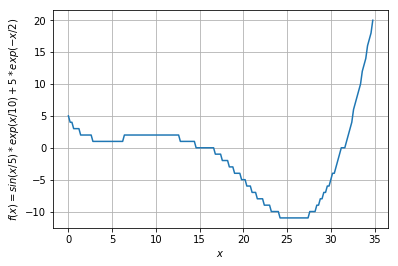

In [26]:
fig = plt.subplots()
x = np.arange(0.0, 35.0, 0.2)
plt.xlabel('$x$') # Метка по оси x в формате TeX
plt.ylabel('$f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)$') # Метка по оси y в формате TeX
plt.grid(True) # Сетка
plt.plot(x, map(h,x))
plt.show()

## Минимизация негладкой функции

#### Минимизация с помощью алгоритма BFGS и начального приближения x0=30

In [27]:
res_bfgs = scipy.optimize.minimize(our_func, x0=30, method='BFGS')
print res_bfgs

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])


#### Минимизация с помощью генетического алгоритма на интервале [1,30]

In [28]:
res_diff = scipy.optimize.differential_evolution(our_func, [(1,30)])
print res_diff

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 92L
     nit: 5
 success: True
       x: array([26.11081614])


## Ответ

$$funBFGS=-5$$ $$funDIFF=-11.0$$

Результаты наглядно показывают что алгоритм BFGS, использующий градиетн, не пригоден для минимизации негладкой функции, в разных точках полученное значение функции соответвует самой исходной точке

#### Пример работы BFGS для прочих начальных приближений

In [29]:
scipy.optimize.minimize(our_func, x0=25, method='BFGS')

      fun: -11
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([25.])

#### Запись результатов в файл

In [30]:
with open('task_third_answer.txt', 'w') as func_value:
    func_value.write(str(res_bfgs.fun) + ' ' + str(res_diff.fun))